# Tasks

- Task 1  [10 Points]: Work with Mnist dataset
    - Perform proper preprocessing and visualization
    - Perform proper hyperparameter tuning **-SVM-**. JUSTIFY ALL THE HYPERPARAMETER VALUES


* Task 2 (Bouns) [3 Points] : Follow [this tutorial](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) on **Naive Bayes** and apply what you learnt on the [Spam Classification dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)



In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.svm import SVC
from keras.datasets import mnist
import keras
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
#libraries used in bonus task
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_train = x_train.astype('float32')
x_train /= 255

# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 28*28)
x_test = x_test.astype('float32')
x_test /= 255


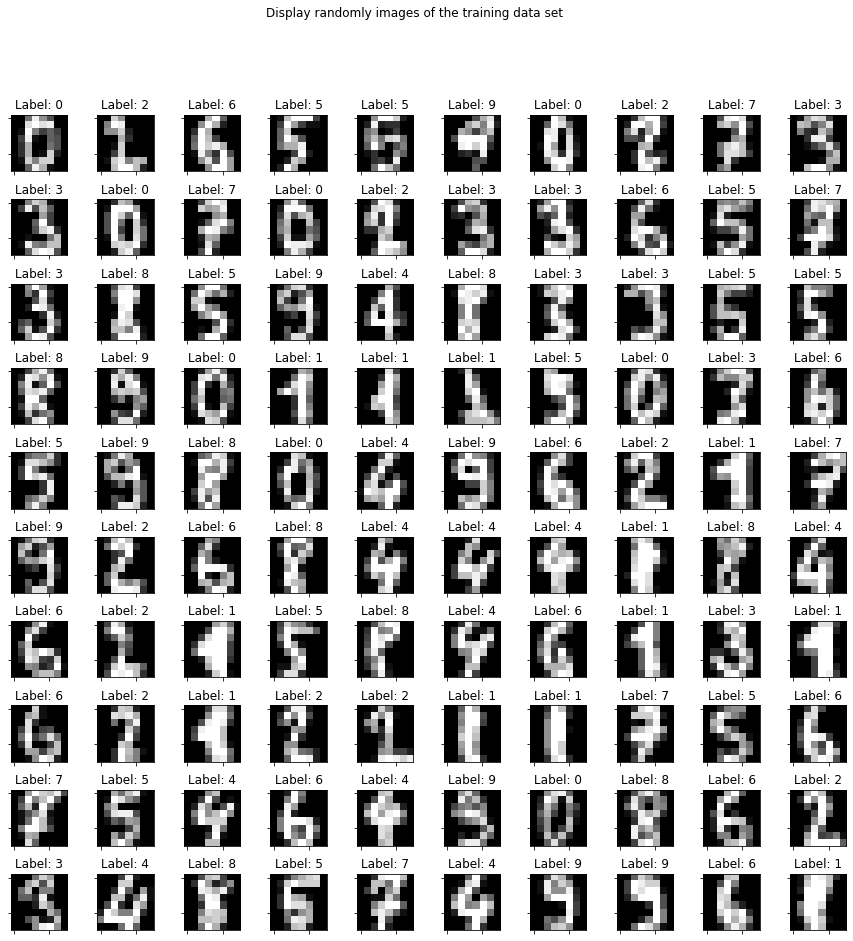

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)

    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(digits.images,digits.target)

#**Preprocessing and Visualization**

In [ ]:
len(x_train)

60000

In [ ]:
#To reduce runtime (since im already pretty late lol) we're going to take a sample from the data to process on.

#Data to be used in the Accuracy test
x_trainSample = x_train[:5000,:]
y_trainSample = y_train[:5000]
x_testSample = x_test[:1000,:]
y_testSample  = y_test[:1000]

#Data to be used in the Tunning
x_trainSample1 = x_train[:600,:]
y_trainSample1 = y_train[:600]
x_testSample1 = x_test[:200,:]
y_testSample1  = y_test[:200]

#Reshaping
x_trainSample = x_trainSample.reshape(x_trainSample.shape[0], 28*28)
x_testSample = x_testSample.reshape(x_testSample.shape[0], 28*28)
x_trainSample1 = x_trainSample1.reshape(x_trainSample1.shape[0], 28*28)
x_testSample1 = x_testSample1.reshape(x_testSample1.shape[0], 28*28)

In [ ]:
#Hyperparameter Tuning - SVM, choosing the parameters of the model for SVM

clf1 = SVC()
clf1.fit(x_train,y_train)
predicted1=clf1.predict(x_test)
print(' Accuracy for Default Parameters :' ,metrics.accuracy_score(y_test,predicted1))

 Accuracy for Default Parameters : 0.9792


In [ ]:
clf2 = SVC(kernel='linear')
clf3 = SVC(kernel='poly')
clf4= SVC(kernel='rbf')

clf2.fit(x_trainSample, y_trainSample)
y2=clf2.predict(x_testSample)
print(' Accuracy :' ,metrics.accuracy_score(y_testSample,y2))

clf3.fit(x_trainSample, y_trainSample)
y3=clf3.predict(x_testSample)
print(' Accuracy :' ,metrics.accuracy_score(y_testSample,y3))

clf4.fit(x_trainSample, y_trainSample)
y4=clf4.predict(x_testSample)
print(' Accuracy :' ,metrics.accuracy_score(y_testSample,y4))



 Accuracy : 0.887
 Accuracy : 0.919
 Accuracy : 0.936


RBF has the highest accuracy

#Tuning

[0.13166666666666665, 0.78, 0.8999999999999998, 0.5983333333333334, 0.13166666666666665, 0.13166666666666665, 0.13166666666666665]


Text(0, 0.5, 'Cross-Validated Accuracy')

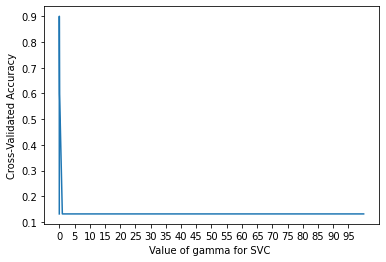

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, x_trainSample1, y_trainSample1, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

[0.8999999999999998, 0.8983333333333332, 0.8949999999999999, 0.8799999999999999, 0.85]


Text(0, 0.5, 'Cross-Validated Accuracy')

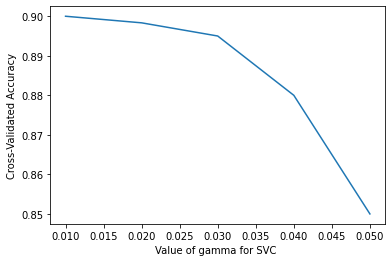

In [ ]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, x_trainSample1, y_trainSample1, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

[0.13166666666666665, 0.78, 0.8999999999999998, 0.5983333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

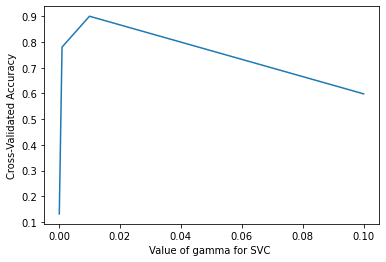

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, x_trainSample1, y_trainSample1, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
tuned_parameters = {
    'C':  (np.arange(0.1,1,0.1)),
        'gamma':[0.01,0.02,0.03,0.04,0.05],

     "kernel":[ 'rbf']

}
svm_model= SVC()

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_score_)
print(model_svm.best_params_)

In [ ]:
y_pred= model_svm.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))

#Bonus Task

In [ ]:
#Reading the Spam Classification Dataset
dataset = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

#Dropping unneccesary columns
dataset = dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

#Renaming columns
dataset.columns = ['label', 'body_text']

#Creating feature and label sets
X = dataset['body_text']
y = dataset['label']

#Splitting into training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

#Initializing the CountVectorizer
count_vector = CountVectorizer()

#Fitting and transforming
trainingdata = count_vector.fit_transform(Xtrain)
testingdata = count_vector.transform(Xtest)

#Initializing the Multinomial Naive Bayes
naive_bayes = MultinomialNB()

#Fitting on training data
naive_bayes.fit(trainingdata, ytrain)

#Making Predictions
predictions = naive_bayes.predict(testingdata)

#Evaluating the model
print('Accuracy Score: ', accuracy_score(ytest, predictions))
print('Confusion Matrix: ', confusion_matrix(ytest, predictions))

Accuracy Score:  0.9883408071748879
Confusion Matrix:  [[938   3]
 [ 10 164]]
